In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from kinetic_function import (fit_function,
                              read_csv_file, 
                              read_csv_file_v2,
                              single_track_analysis,
                              autocorrelation,
                              fit_autocorrelation,
                              fit_autocorrelation_v2,
                              check_continuous_time,
                              calculate_MSD,
                              generate_track
                             )

In [2]:
# path_save = "D:/OneDrive - University of Warwick/06-KineticAnalysisMounia/4-Figures"
path_save = "/home/u2175049/Documents/Code/KineticAnalysis/notebook/figures/"

In [3]:
prot_aa_size = {
    "32xsuntag": 796,  #768/32=24 , left 28
    "linker": 4,
    "twist": 490,
    "ilp4": 134,
    "snail": 390,
    "very_long_prot":2000, 
}

In [8]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
for i in range(100):
    x_global, y_global, y_start_prot = generate_track(prot_length = prot_length, 
                                                      suntag_appearance=24, 
                                                      fluo_max_ref=32, 
                                                      fluo_max=128, 
                                                      translation_rate=24, 
                                                      binding_rate=0.05,
                                                      step = 0.1)
    if i == 0:
        datas = pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })
    else:
        datas = pd.concat([datas, 
                           pd.DataFrame({"FRAME":x_global,
                          "MEAN_INTENSITY_CH1":y_global,
                          "TRACK_ID" : i
                             })], ignore_index=True)
datas.to_csv("datas_test_dt.csv")

In [4]:
prot_length = prot_aa_size["32xsuntag"]+prot_aa_size["snail"]
datas = pd.read_csv("datas_test_dt.csv")

In [5]:
for i in range(100):
    (x, 
    y, 
    x_auto, 
    y_auto, 
    elongation_r, 
    translation_init_r,
    perr) = single_track_analysis(datas, 
                                 i, 
                                 delta_t = 0.1,
                                 protein_size=prot_length,
                                 normalise_intensity=1,
                                 normalize_auto=True,
                                 mm=None,
                                 lowpass_=False,
                                 cutoff=100,
                                 rtol=1e-1,
                                 method="linear",
                                 force_analysis=True,
                                 first_dot=True)
    if i==0:
        results = pd.DataFrame({"elongation_r":elongation_r, 
                                "init_translation_r":translation_init_r, 
                                "dt":0.1,
                               "id":i},
                              index=[0])
    
    else:
        results = pd.concat([results, 
                        pd.DataFrame({"elongation_r":elongation_r, "init_translation_r":translation_init_r, "dt":0.1, "id":i}, index=[0])
                        ], ignore_index=True)

to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear method
to fix
linear

In [6]:
for t in [10, 30, 100, 300, 600]:
    datas2 = datas[::t]
    dt = t*0.1
    for i in range(100):
        (x, 
        y, 
        x_auto, 
        y_auto, 
        elongation_r, 
        translation_init_r,
        perr) = single_track_analysis(datas2, 
                                     i, 
                                     delta_t = dt,
                                     protein_size=prot_length,
                                     normalise_intensity=1,
                                     normalize_auto=True,
                                     mm=None,
                                     lowpass_=False,
                                     cutoff=100,
                                     rtol=1e-1,
                                     method="linear",
                                     force_analysis=True,
                                     first_dot=True)
        
        results = pd.concat([results, 
                            pd.DataFrame({"elongation_r":elongation_r, "init_translation_r":translation_init_r, "dt":dt, "id":i}, index=[0])
                            ], ignore_index=True)

linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear method
linear

not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
not fix
force analysis
linear method
n

In [7]:
results.groupby(by='dt')[['elongation_r','init_translation_r']].mean()

,elongation_r,init_translation_r
dt,,
0.1,22.373563,0.041468
1.0,22.317854,0.041187
3.0,21.839473,0.040288
10.0,19.863015,0.036732
30.0,15.800156,0.029061
60.0,3.865256,-0.481915


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


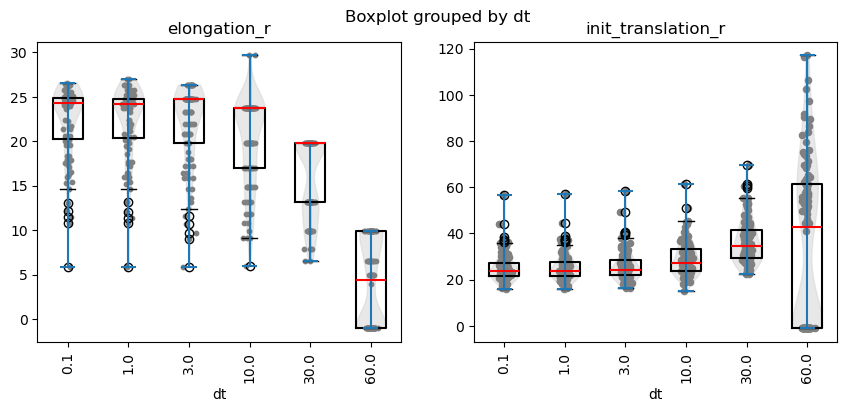

In [8]:
fig, ax = plt.subplots(1,2)
results['init_translation_r'] = 1/results['init_translation_r']
results.boxplot(['elongation_r'] , 
               by='dt', 
               grid=False, 
               ax = ax[0],
               rot=90, 
                boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
              )

violin = ax[0].violinplot(dataset = [results[results.dt == 0.1]["elongation_r"].values,
                           results[results.dt == 1.0]["elongation_r"].values,
                          results[results.dt == 3.0]["elongation_r"].values,
                          results[results.dt == 10.0]["elongation_r"].values,
                          results[results.dt == 30.0]["elongation_r"].values,
                          results[results.dt == 60.0]["elongation_r"].values,])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

results.boxplot(['init_translation_r'] , 
               by='dt', 
               grid=False, 
               ax = ax[1],
               rot=90,
               boxprops=dict(linestyle='-', linewidth=1.5, color="black"),
               medianprops=dict(linestyle='-', linewidth=1.5, color="red"),
               )


violin = ax[1].violinplot(dataset = [results[results.dt == 0.1]["init_translation_r"].values,
                           results[results.dt == 1.0]["init_translation_r"].values,
                          results[results.dt == 3.0]["init_translation_r"].values,
                          results[results.dt == 10.0]["init_translation_r"].values,
                          results[results.dt == 30.0]["init_translation_r"].values,
                          results[results.dt == 60.0]["init_translation_r"].values,])
for pc in violin["bodies"]:
    pc.set_facecolor("lightgrey")
    pc.set_edgecolor("lightgrey")
    pc.set_alpha(0.5)

group = 'dt'
column = 'elongation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[0].scatter(x, val, c='grey', alpha=1, s=10)
    
group = 'dt'
column = 'init_translation_r'
grouped = results.groupby(group)
names, vals, xs = [], [] ,[]
for i, (name, subdf) in enumerate(grouped):
    names.append(name)
    vals.append(subdf[column].tolist())
    xs.append(np.random.normal(i+1, 0.04, subdf.shape[0]))
clevels = np.linspace(0., 1., len(grouped))
for x, val, clevel in zip(xs, vals, clevels):
    ax[1].scatter(x, val, c='grey', alpha=1, s=20)
# ax[1].set_ylim(0,0.1)
    
# ax[1].set_ylim(0,250)
fig.set_size_inches((10,4))
fig.savefig(os.path.join(path_save, "results_delta_t_boxplot_linear_diff.eps"), dpi=300)

In [15]:
results[3::100]

,elongation_r,init_translation_r,dt,id
3,14.552147,0.032119,0.1,3
103,14.641975,0.031909,1.0,3
203,15.205128,0.031964,3.0,3
303,8.471429,0.023600,10.0,3
403,6.588889,0.019203,30.0,3
503,6.588889,0.013744,60.0,3


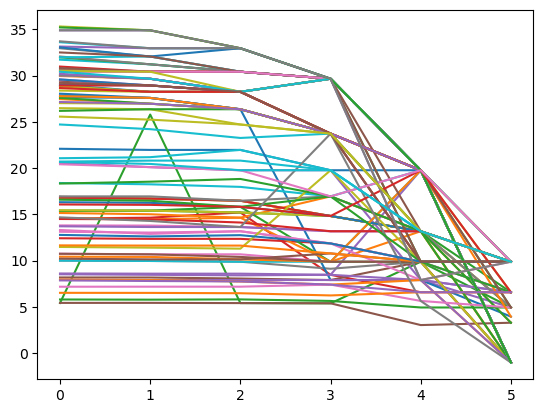

In [16]:
fig, ax = plt.subplots()
for i in range(100):
    ax.plot(range(6), results[i::100]["elongation_r"])

In [17]:
results

,elongation_r,init_translation_r,dt,id
0,22.085661,0.030738,0.1,0
1,29.949495,0.056837,0.1,1
2,5.427918,0.025032,0.1,2
3,14.552147,0.032119,0.1,3
4,20.554593,0.034079,0.1,4
...,...,...,...,...
595,9.883333,0.014489,60.0,95
596,9.883333,0.015652,60.0,96
597,9.883333,0.020909,60.0,97
598,9.883333,0.019611,60.0,98


In [9]:
datas[datas["TRACK_ID"]==0][::10]

,Unnamed: 0,FRAME,MEAN_INTENSITY_CH1,TRACK_ID
0,0,0.0,595.6,0
10,10,1.0,607.6,0
20,20,2.0,491.6,0
30,30,3.0,503.6,0
40,40,4.0,515.6,0
...,...,...,...,...
57950,57950,5795.0,5.2,0
57960,57960,5796.0,9.2,0
57970,57970,5797.0,13.2,0
57980,57980,5798.0,17.2,0
